# Heart Attack in Japan Youth and Adult

https://www.kaggle.com/datasets/ashaychoudhary/heart-attack-in-japan-youth-vs-adult/code

**Documentation** : 

- https://datascience.stackexchange.com/questions/71515/should-i-scale-data-before-or-after-balancing-dataset

- https://pmc.ncbi.nlm.nih.gov/articles/PMC5987310/pdf/JHE2018-6275435.pdf

- https://www.questionpro.com/blog/fr/reponse-types-biais-et-comment-sen-sortir/


For SMOTE : 

- https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/

- https://www.baeldung.com/cs/synthetic-minority-oversampling-technique?

- https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

## Import the dataset

In [1]:
#pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashaychoudhary/heart-attack-in-japan-youth-vs-adult")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kelia\.cache\kagglehub\datasets\ashaychoudhary\heart-attack-in-japan-youth-vs-adult\versions\1


In [3]:
import pandas as pd
import os
print(os.listdir(path))

['japan_heart_attack_dataset.csv']


In [4]:
data = pd.read_csv(path + '/japan_heart_attack_dataset.csv')
data.head()

,Age,Gender,Region,Smoking_History,Diabetes_History,Hypertension_History,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,...,Extra_Column_6,Extra_Column_7,Extra_Column_8,Extra_Column_9,Extra_Column_10,Extra_Column_11,Extra_Column_12,Extra_Column_13,Extra_Column_14,Extra_Column_15
0,56,Male,Urban,Yes,No,No,186.400209,Moderate,Poor,Low,...,0.007901,0.794583,0.290779,0.497193,0.521995,0.799657,0.722398,0.148739,0.834010,0.061632
1,69,Male,Urban,No,No,No,185.136747,Low,Good,Low,...,0.083933,0.688951,0.830164,0.634490,0.302043,0.043683,0.451668,0.878671,0.535602,0.617825
2,46,Male,Rural,Yes,No,No,210.696611,Low,Average,Moderate,...,0.227205,0.496344,0.752107,0.181501,0.629180,0.018276,0.063227,0.146512,0.997296,0.974455
3,32,Female,Urban,No,No,No,211.165478,Moderate,Good,High,...,0.403182,0.741409,0.223968,0.329314,0.143191,0.907781,0.542322,0.922461,0.626217,0.228606
4,60,Female,Rural,No,No,No,223.814253,High,Good,High,...,0.689787,0.904574,0.757098,0.337761,0.362375,0.728552,0.176699,0.484749,0.312091,0.452809


In [5]:
# Prepare the palette for the visualization
import seaborn as sns

custom_palette = sns.blend_palette(['rosybrown', 'darkkhaki'], n_colors=4, as_cmap=False)

## EDA

In [6]:
data.shape

(30000, 32)

In [7]:
data.describe()

,Age,Cholesterol_Level,Stress_Levels,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Extra_Column_1,Extra_Column_2,Extra_Column_3,...,Extra_Column_6,Extra_Column_7,Extra_Column_8,Extra_Column_9,Extra_Column_10,Extra_Column_11,Extra_Column_12,Extra_Column_13,Extra_Column_14,Extra_Column_15
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,48.492300,199.899752,5.001629,24.997480,69.977309,119.912088,80.027298,0.501939,0.497894,0.498195,...,0.502763,0.498075,0.500356,0.500229,0.501069,5.044949e-01,0.500862,0.500456,0.497651,0.499963
std,17.902913,29.971334,1.977023,5.001963,10.017331,15.009571,9.988558,0.288233,0.289298,0.288064,...,0.287693,0.288034,0.288675,0.288404,0.289598,2.891414e-01,0.289411,0.288868,0.288128,0.288800
min,18.000000,80.020033,0.000000,5.579649,30.029853,56.229547,39.954537,0.000007,0.000005,0.000023,...,0.000053,0.000068,0.000045,0.000031,0.000013,8.328106e-07,0.000071,0.000020,0.000003,0.000024
25%,33.000000,179.551714,3.643616,21.633640,63.248483,109.785678,73.262516,0.253308,0.247361,0.248309,...,0.255999,0.248284,0.250979,0.250245,0.248426,2.538092e-01,0.250534,0.247311,0.248215,0.248257
50%,48.000000,199.774394,4.993483,24.964182,69.951067,119.897755,80.119600,0.500820,0.496198,0.497610,...,0.501773,0.498816,0.498570,0.498449,0.503104,5.067589e-01,0.503861,0.504116,0.494384,0.500941
75%,64.000000,220.160757,6.352750,28.361652,76.661745,130.024432,86.757873,0.750529,0.747395,0.747681,...,0.751189,0.745638,0.750729,0.751219,0.752269,7.556257e-01,0.751178,0.749709,0.745621,0.748738
max,79.000000,336.863442,10.000000,46.096832,108.782169,178.772775,117.673278,0.999965,0.999989,0.999969,...,0.999889,0.999990,0.999930,0.999985,0.999993,9.999578e-01,0.999948,0.999945,0.999978,0.999991


There are columns called Extra_Column_[number] that are not useful for us

### Removing unnecessary columns

In [8]:
data.columns

Index(['Age', 'Gender', 'Region', 'Smoking_History', 'Diabetes_History',
       'Hypertension_History', 'Cholesterol_Level', 'Physical_Activity',
       'Diet_Quality', 'Alcohol_Consumption', 'Stress_Levels', 'BMI',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Family_History',
       'Heart_Attack_Occurrence', 'Extra_Column_1', 'Extra_Column_2',
       'Extra_Column_3', 'Extra_Column_4', 'Extra_Column_5', 'Extra_Column_6',
       'Extra_Column_7', 'Extra_Column_8', 'Extra_Column_9', 'Extra_Column_10',
       'Extra_Column_11', 'Extra_Column_12', 'Extra_Column_13',
       'Extra_Column_14', 'Extra_Column_15'],
      dtype='object')

In [9]:
# Drop the Extra_Columns
columns_to_drop = [f'Extra_Column_{i}' for i in range(1, 16)]
data.drop(columns=columns_to_drop, axis=1, inplace=True)
data.columns

Index(['Age', 'Gender', 'Region', 'Smoking_History', 'Diabetes_History',
       'Hypertension_History', 'Cholesterol_Level', 'Physical_Activity',
       'Diet_Quality', 'Alcohol_Consumption', 'Stress_Levels', 'BMI',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Family_History',
       'Heart_Attack_Occurrence'],
      dtype='object')

### Duplicated or null values

In [10]:
# Checking for null
data.isnull().sum()

Age                           0
Gender                        0
Region                        0
Smoking_History               0
Diabetes_History              0
Hypertension_History          0
Cholesterol_Level             0
Physical_Activity             0
Diet_Quality                  0
Alcohol_Consumption        3015
Stress_Levels                 0
BMI                           0
Heart_Rate                    0
Systolic_BP                   0
Diastolic_BP                  0
Family_History                0
Heart_Attack_Occurrence       0
dtype: int64

In [11]:
# Checking for duplicated rows
data.duplicated().sum()

0

In [12]:
data['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Moderate    12059
Low          9098
High         5828
Name: count, dtype: int64

In [13]:
data['Alcohol_Consumption'].value_counts(normalize=True)

Alcohol_Consumption
Moderate    0.446878
Low         0.337150
High        0.215972
Name: proportion, dtype: float64

We could either remove the null values or replace the null by the most represented class which is moderate. We could also set the values according to the proportions of the 'Alcohol_Consumption'. So the values is randomly set with a higher chance to be Moderate (45%) and so on.

#### Feature Engineering

In [14]:
import random

# Calculate the probabilities of each alcohol consumption category
probabilities = data['Alcohol_Consumption'].value_counts(normalize=True)

# Create a list of possible values and their corresponding probabilities
values = list(probabilities.index)
probs = list(probabilities.values)

# Identify indices where the values are NaN
nan_indices = data['Alcohol_Consumption'].isnull()

# Replace null values with random values based on the calculated probabilities
data.loc[nan_indices, 'Alcohol_Consumption'] = random.choices(
    values, weights=probs, k=nan_indices.sum()
)

In [15]:
data['Alcohol_Consumption'].isna().sum()

0

In [16]:
data['Alcohol_Consumption'].value_counts(normalize=True)

Alcohol_Consumption
Moderate    0.4479
Low         0.3371
High        0.2150
Name: proportion, dtype: float64

### Any outliers?

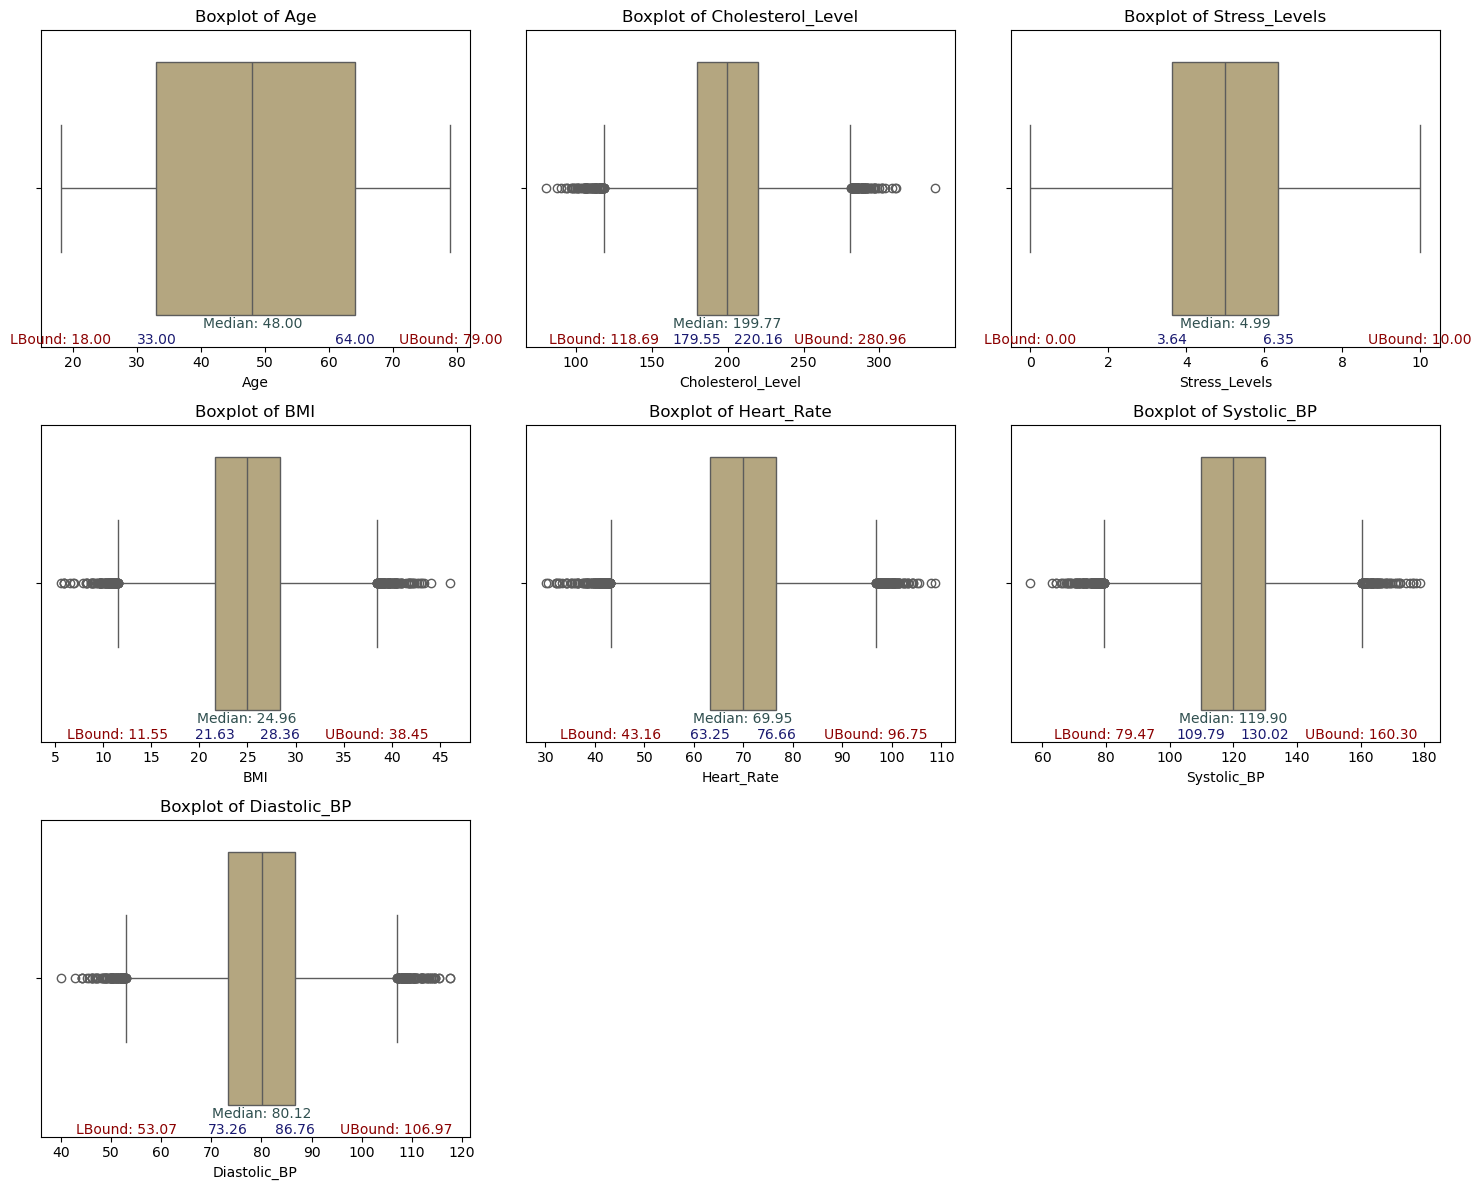

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for boxplot
numerical_cols = data.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
n_cols = 3  # Adjust as needed
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through numerical columns and create boxplots
for i, col in enumerate(numerical_cols):
    # Create boxplot
    sns.boxplot(x=data[col], ax=axes[i], color=custom_palette[2])
    axes[i].set_title(f'Boxplot of {col}')

    # Calculate the statistics of the boxplot
    desc = data[col].dropna().describe(percentiles=[0.25, 0.5, 0.75])
    Q1 = desc['25%']  # First quartile
    Q3 = desc['75%']  # Third quartile
    median = desc['50%']  # Median
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Outlier lower bound
    upper_bound = Q3 + 1.5 * IQR  # Outlier upper bound
    whisker_min = data[col][data[col] >= lower_bound].min()  # Actual whisker min
    whisker_max = data[col][data[col] <= upper_bound].max()  # Actual whisker max

    # Add text annotations
    axes[i].text(median, 0.45, f'Median: {median:.2f}', ha='center', va='bottom', color='darkslategrey')
    axes[i].text(Q1, 0.5, f'{Q1:.2f}', ha='center', va='bottom', color='midnightblue')
    axes[i].text(Q3, 0.5, f'{Q3:.2f}', ha='center', va='bottom', color='midnightblue')
    axes[i].text(whisker_min, 0.5, f'LBound: {whisker_min:.2f}', ha='center', va='bottom', color='darkred')
    axes[i].text(whisker_max, 0.5, f'UBound: {whisker_max:.2f}', ha='center', va='bottom', color='darkred')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_axis_off()

plt.tight_layout()
plt.show()

The outliers for the Cholesterol Level, Systolic and Diastolic blood pressure seem to be a lot higher than normals. I won't remove these observations because I don't have enough information on the dataset. There could be many people with unusual characteristics in their sample.

### Correlations

In [18]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data2 = data.copy()

# Convert the target variable to numeric (0 and 1)
data2['Heart_Attack_Occurrence'] = data2['Heart_Attack_Occurrence'].map({'No': 0, 'Yes': 1})

# Define categorical variables

ordinal_cols = ["Physical_Activity", "Diet_Quality", "Alcohol_Consumption"]
one_hot_cols = data2.select_dtypes(include=['object', 'category']).columns.difference(ordinal_cols)


# Apply Ordinal Encoding for ordered categorical variables
ordinal_encoder = OrdinalEncoder()
data2[ordinal_cols] = ordinal_encoder.fit_transform(data2[ordinal_cols])


# Apply One-Hot Encoding for other categorical variables
data2 = pd.get_dummies(data2, columns=one_hot_cols, drop_first=True)

In [19]:
data2

,Age,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,Stress_Levels,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Heart_Attack_Occurrence,Diabetes_History_Yes,Family_History_Yes,Gender_Male,Hypertension_History_Yes,Region_Urban,Smoking_History_Yes
0,56,186.400209,2.0,2.0,1.0,3.644786,33.961349,72.301534,123.902090,85.682809,0,False,False,True,False,True,True
1,69,185.136747,1.0,1.0,1.0,3.384056,28.242873,57.457640,129.893306,73.524262,0,False,True,True,False,True,False
2,46,210.696611,1.0,0.0,2.0,3.810911,27.601210,64.658697,145.654901,71.994812,0,False,False,True,False,False,True
3,32,211.165478,2.0,1.0,0.0,6.014878,23.717291,55.131469,131.785220,68.211333,0,False,False,False,False,True,False
4,60,223.814253,0.0,1.0,0.0,6.806883,19.771578,76.667917,100.694559,92.902489,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,68,200.331218,2.0,0.0,1.0,4.636488,25.187205,62.863074,103.427533,86.778317,0,False,False,False,False,True,False
29996,69,211.305863,1.0,1.0,2.0,3.258175,27.432525,89.024263,122.130067,88.516513,0,True,False,True,False,True,False
29997,23,247.182956,2.0,0.0,0.0,5.930121,29.053131,83.672958,118.726793,79.765509,0,False,False,False,False,False,False
29998,45,222.262521,1.0,2.0,0.0,3.517361,32.847927,67.614209,134.028414,84.330021,0,False,True,True,False,False,False


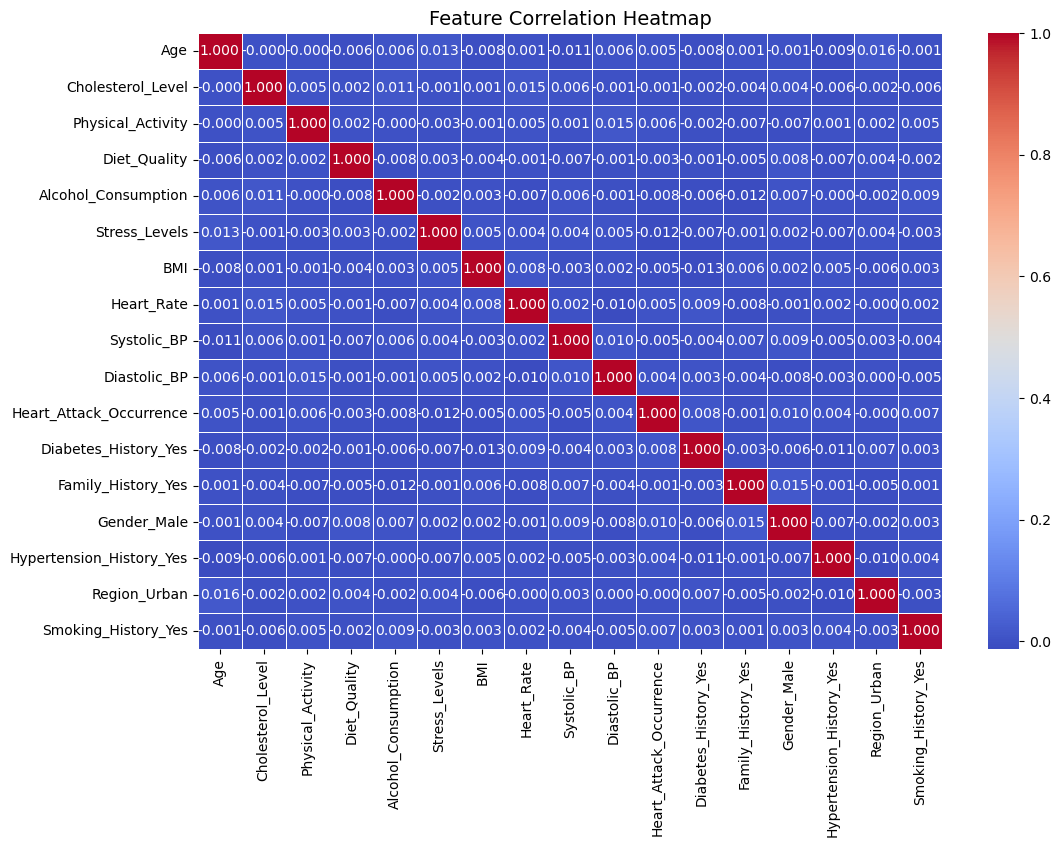

In [20]:
# Compute correlation matrix
correlation_matrix = data2.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# Add a title

plt.title("Feature Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()

This type of correlation matrix is not common, and this might be due to the fact that our variables are strongly unbalanced.

### Checking independant variable class distribution

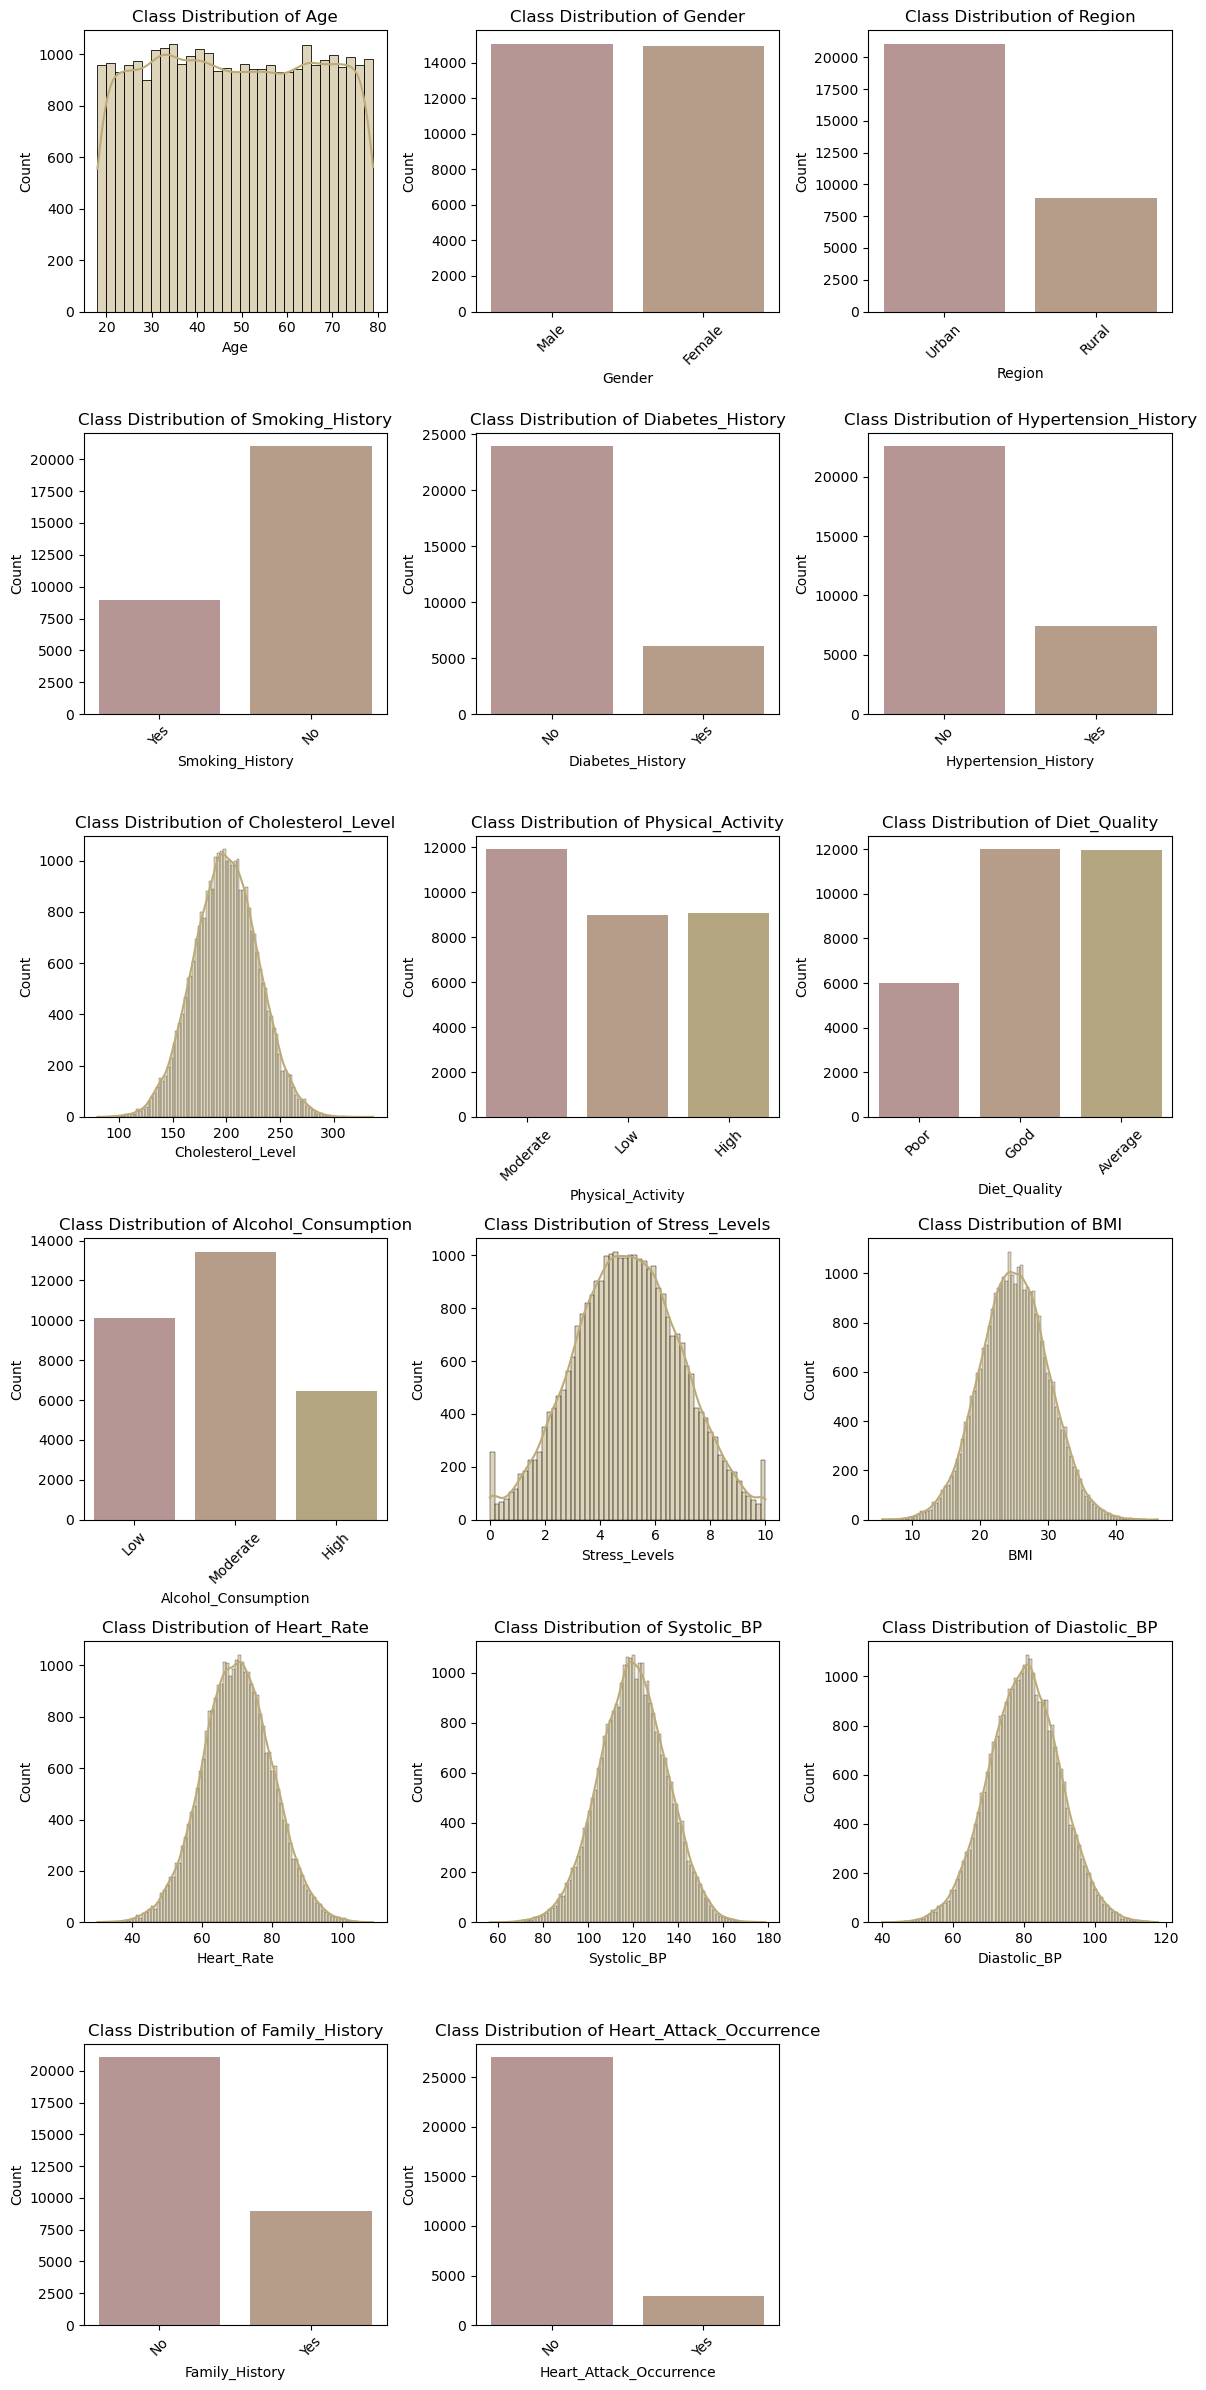

In [21]:
import warnings

# Remove verbose messages before displaying plots
warnings.filterwarnings("ignore")

# List of independent variables (excluding 'Heart_Attack_Occurence')
independent_variables = [col for col in data.columns if col != 'Heart_Attack_Occurence']

# Calculate the total number of plots and subplot grid layout
n_plots = len(independent_variables)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate the number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through each independent variable
for i, variable in enumerate(independent_variables):
    ax = axes[i]

    # Check if the variable is categorical
    if isinstance(data[variable].dtype, pd.CategoricalDtype) or data[variable].dtype == 'object':
        # Use countplot for categorical variables
        sns.countplot(
            x=variable,
            data=data,
            ax=ax,
            palette=custom_palette,
            hue=None,
            legend=False
        )
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    else:
        # Use histogram for numerical variables
        sns.histplot(
            data[variable],
            ax=ax,
            kde=True,
            color=custom_palette[2]
        )

    ax.set_title(f'Class Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_axis_off()

plt.tight_layout()
plt.show()

Most of the categorical variables are imbalanced.

For the distribution of stress levels, with peaks at 0 and 10, it might result from response biases such as extreme response bias, social desirability bias, and subjective interpretation of the scale. People tend to favor extreme options to express strong opinions or emotions.


> https://www.questionpro.com/blog/fr/reponse-types-biais-et-comment-sen-sortir/

In [22]:
print("Stress_Levels == 0")
data[data["Stress_Levels"] == 0].describe(include='all')

Stress_Levels == 0


,Age,Gender,Region,Smoking_History,Diabetes_History,Hypertension_History,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,Stress_Levels,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Family_History,Heart_Attack_Occurrence
count,201.000000,201,201,201,201,201,201.000000,201,201,201,201.0,201.000000,201.000000,201.000000,201.000000,201,201
unique,NaN,2,2,2,2,2,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,Female,Urban,No,No,No,NaN,Moderate,Average,Moderate,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,105,131,144,157,150,NaN,90,94,80,NaN,NaN,NaN,NaN,NaN,138,174
mean,47.532338,NaN,NaN,NaN,NaN,NaN,196.028007,NaN,NaN,NaN,0.0,24.680998,70.175145,121.069107,80.781535,NaN,NaN
std,17.927359,NaN,NaN,NaN,NaN,NaN,28.856122,NaN,NaN,NaN,0.0,4.986091,10.591842,15.149278,9.519144,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,113.276803,NaN,NaN,NaN,0.0,9.739126,32.824122,79.215988,49.548635,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,176.028966,NaN,NaN,NaN,0.0,21.264030,64.001403,111.491504,73.431806,NaN,NaN
50%,47.000000,NaN,NaN,NaN,NaN,NaN,197.240157,NaN,NaN,NaN,0.0,24.601211,70.164200,120.722374,80.981491,NaN,NaN
75%,63.000000,NaN,NaN,NaN,NaN,NaN,214.125327,NaN,NaN,NaN,0.0,28.360974,77.534320,132.487137,86.912526,NaN,NaN


In [23]:
print("Stress_Levels == 10")
data[data["Stress_Levels"] == 10].describe(include='all')

Stress_Levels == 10


,Age,Gender,Region,Smoking_History,Diabetes_History,Hypertension_History,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,Stress_Levels,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Family_History,Heart_Attack_Occurrence
count,188.000000,188,188,188,188,188,188.000000,188,188,188,188.0,188.000000,188.000000,188.000000,188.000000,188,188
unique,NaN,2,2,2,2,2,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,Male,Urban,No,No,No,NaN,Moderate,Average,Moderate,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,97,132,134,155,135,NaN,78,80,89,NaN,NaN,NaN,NaN,NaN,122,169
mean,49.622340,NaN,NaN,NaN,NaN,NaN,197.810278,NaN,NaN,NaN,10.0,24.848270,71.255726,119.778065,79.771127,NaN,NaN
std,19.273182,NaN,NaN,NaN,NaN,NaN,29.709930,NaN,NaN,NaN,0.0,5.595906,9.653414,16.042528,10.730092,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,117.084185,NaN,NaN,NaN,10.0,10.480973,46.275918,77.713920,53.810227,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,178.013232,NaN,NaN,NaN,10.0,21.400372,64.735497,106.828488,72.958049,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN,198.357056,NaN,NaN,NaN,10.0,24.978113,71.401137,119.819076,79.682520,NaN,NaN
75%,69.000000,NaN,NaN,NaN,NaN,NaN,220.385351,NaN,NaN,NaN,10.0,28.443355,76.865926,131.754510,86.802936,NaN,NaN


It might be interesting to conduct a psychological analysis of human beings and question whether these data points are necessary for detecting heart attacks. However, based on the research I've done, I cannot conclusively say whether it is beneficial to keep these extremes.

I have another line of thought: the Stress Level reported in the survey could also reflect anxiety about health that some individuals may have. The nocebo effect has been the subject of several studies with positive results, showing that negative beliefs and expectations regarding health can have a real impact on it.

Returning to our topic, perhaps the stress level felt by these individuals is a reflection of their anxiety about their health, meaning the nocebo effect could potentially impact their cardiovascular health.

That being said, since their responses are likely biased, as we discussed earlier, and some machine learning algorithms are very sensitive to outliers, it is also possible to reduce the impact of these aberrant values by applying a transformation to the data, which diminishes the influence of extreme values.


In [24]:
x1 = data[(data['Stress_Levels'] == 0) & (data['Heart_Attack_Occurrence'] == 'Yes')].shape[0]
x2 = data[(data['Stress_Levels'] == 10) & (data['Heart_Attack_Occurrence'] == 'Yes')].shape[0]
n1 = data[(data['Stress_Levels'] == 0)].shape[0]
n2 = data[(data['Stress_Levels'] == 10)].shape[0]

print(f'Number of people that had a heart attack knowing they answered 0 to the stress level question : {x1}')
print(f'Porcentage of people showing a stress level of 0 and cardiovascular disease: {round(x1 / n1 * 100, 2)}%')
print(f'Number of people that had a heart attack knowing they answered 10 to the stress level question : {x2}')
print(f'Porcentage of people showing a stress level of 10 and cardiovascular disease: {round(x2 / n2 * 100, 2)}%')

Number of people that had a heart attack knowing they answered 0 to the stress level question : 27
Porcentage of people showing a stress level of 0 and cardiovascular disease: 13.43%
Number of people that had a heart attack knowing they answered 10 to the stress level question : 19
Porcentage of people showing a stress level of 10 and cardiovascular disease: 10.11%


Even though the sample size are small I am going to do a z-test with a 5% significance level.

#### Z-test


- $H_0$: There is no significant difference in heart attack occurrences between stress levels 0 and 10.

- $H_1$: There is a significant difference in heart attack occurrences between stress levels 0 and 10.


In [25]:
import numpy as np
import statsmodels.api as sm

count = np.array([x1, x2])  # Number of heart attacks in each group
nobs = np.array([n1, n2])  # Total observations in each group

z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='two-sided')

print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in heart attack occurrences between stress levels 0 and 10.")
else:
    print("There is no significant difference in heart attack occurrences between stress levels 0 and 10.")

Z-statistic: 1.0153
P-value: 0.3099
There is no significant difference in heart attack occurrences between stress levels 0 and 10.


We cannot determine whether the thought I had earlier is true or not based on the data. Given the uncertainty and the likelihood of biased responses, I prefer to apply Robust Scaling to reduce the impact of extreme values.

#### Feature engineering

(array([ 654., 1290., 2754., 4618., 5721., 5684., 4497., 2738., 1376.,
         668.]),
 array([-1.84320261, -1.474081  , -1.1049594 , -0.7358378 , -0.3667162 ,
         0.0024054 ,  0.371527  ,  0.7406486 ,  1.1097702 ,  1.4788918 ,
         1.8480134 ]),
 <BarContainer object of 10 artists>)

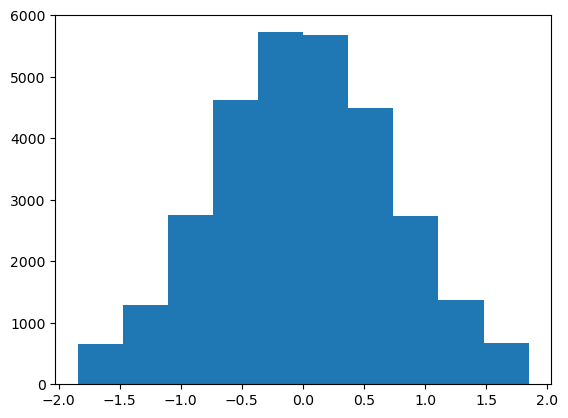

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data['Stress_Levels_scaled'] = scaler.fit_transform(data[['Stress_Levels']])
plt.hist(data['Stress_Levels_scaled'])

### Checking feature distributions

In [27]:
data.dtypes

Age                          int64
Gender                      object
Region                      object
Smoking_History             object
Diabetes_History            object
Hypertension_History        object
Cholesterol_Level          float64
Physical_Activity           object
Diet_Quality                object
Alcohol_Consumption         object
Stress_Levels              float64
BMI                        float64
Heart_Rate                 float64
Systolic_BP                float64
Diastolic_BP               float64
Family_History              object
Heart_Attack_Occurrence     object
Stress_Levels_scaled       float64
dtype: object

In [28]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop('Heart_Attack_Occurrence')

# Iterate over each categorical column and print normalized value counts
for col in categorical_columns:
    print(f"Distribution for {col}:")
    print(data[col].value_counts(normalize=True).to_string())
    print("\n")

Distribution for Gender:
Gender
Male      0.502233
Female    0.497767


Distribution for Region:
Region
Urban    0.702033
Rural    0.297967


Distribution for Smoking_History:
Smoking_History
No     0.7001
Yes    0.2999


Distribution for Diabetes_History:
Diabetes_History
No     0.796767
Yes    0.203233


Distribution for Hypertension_History:
Hypertension_History
No     0.751533
Yes    0.248467


Distribution for Physical_Activity:
Physical_Activity
Moderate    0.397467
High        0.303033
Low         0.299500


Distribution for Diet_Quality:
Diet_Quality
Good       0.400200
Average    0.399033
Poor       0.200767


Distribution for Alcohol_Consumption:
Alcohol_Consumption
Moderate    0.4479
Low         0.3371
High        0.2150


Distribution for Family_History:
Family_History
No     0.702133
Yes    0.297867




In [29]:
data['Diabetes_History'].value_counts(normalize=True)

Diabetes_History
No     0.796767
Yes    0.203233
Name: proportion, dtype: float64

### Checking target variable class distribution

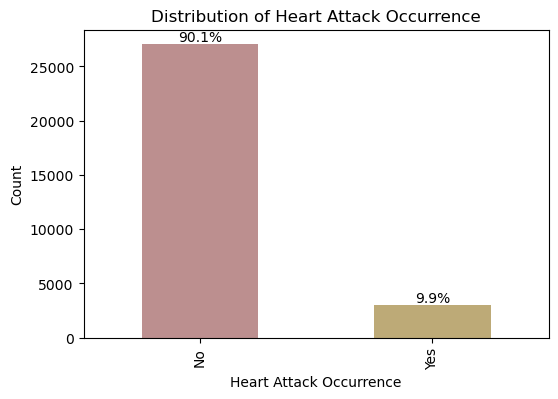

In [30]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(6,4))
ax = data['Heart_Attack_Occurrence'].value_counts().plot(kind='bar', color=[custom_palette[0], custom_palette[2]])
plt.title('Distribution of Heart Attack Occurrence')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Count')

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(data)*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

The class imbalance is quite significant. However, we can artificially increase the minority class or decrease the majority class. In my case, I will increase the minority class since there are only 30,000 observations in our dataset. We can iterate and try different methods and different balancing for the classes. The objective is to diminish the bias introduced by generating new observations / duplicating observations / reducing the majority class... I could even not modify the imbalance and use machine learning algorithm that are not sensible for imbalancement like **Random Forest**, **XGBoost**, **LightGBM**... 

Some machine learning algorithm can also give us the possibility to adjust classes weights to give more importance to the minority class.

### Scaling the numerical features before resampling

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scale numerical features
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('Age')
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Use min max normalization for 'Age' since the data are not following a normal distribution
min_max_scaler = MinMaxScaler()
data['Age'] = min_max_scaler.fit_transform(data[['Age']])

<Axes: >

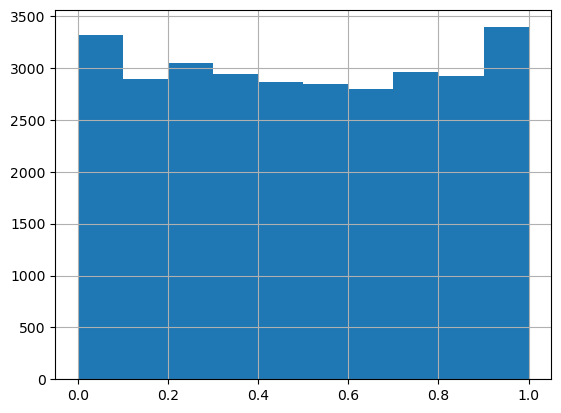

In [32]:
data['Age'].hist()

In [33]:
data[numerical_cols]

,Cholesterol_Level,Stress_Levels,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Stress_Levels_scaled
0,-0.450423,-0.686317,1.792100,0.232024,0.265835,0.566208,-0.686317
1,-0.492579,-0.818200,0.648835,-1.249822,0.665001,-0.651059,-0.818200
2,0.360246,-0.602288,0.520550,-0.530950,1.715122,-0.804182,-0.602288
3,0.375890,0.512521,-0.255942,-1.482040,0.791051,-1.182970,0.512521
4,0.797926,0.913133,-1.044788,0.667914,-1.280373,1.289015,0.913133
...,...,...,...,...,...,...,...
29995,0.014396,-0.184695,0.037931,-0.710205,-1.098288,0.675886,-0.184695
29996,0.380574,-0.881873,0.486826,1.901432,0.147773,0.849908,-0.881873
29997,1.577641,0.469649,0.810825,1.367218,-0.078971,-0.026209,0.469649
29998,0.746151,-0.750771,1.569499,-0.235905,0.940504,0.430772,-0.750771


### Spliting data for scaling and encoding

In [34]:
data

,Age,Gender,Region,Smoking_History,Diabetes_History,Hypertension_History,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,Stress_Levels,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Family_History,Heart_Attack_Occurrence,Stress_Levels_scaled
0,0.622951,Male,Urban,Yes,No,No,-0.450423,Moderate,Poor,Low,-0.686317,1.792100,0.232024,0.265835,0.566208,No,No,-0.686317
1,0.836066,Male,Urban,No,No,No,-0.492579,Low,Good,Low,-0.818200,0.648835,-1.249822,0.665001,-0.651059,Yes,No,-0.818200
2,0.459016,Male,Rural,Yes,No,No,0.360246,Low,Average,Moderate,-0.602288,0.520550,-0.530950,1.715122,-0.804182,No,No,-0.602288
3,0.229508,Female,Urban,No,No,No,0.375890,Moderate,Good,High,0.512521,-0.255942,-1.482040,0.791051,-1.182970,No,No,0.512521
4,0.688525,Female,Rural,No,No,No,0.797926,High,Good,High,0.913133,-1.044788,0.667914,-1.280373,1.289015,No,No,0.913133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.819672,Female,Urban,No,No,No,0.014396,Moderate,Average,Low,-0.184695,0.037931,-0.710205,-1.098288,0.675886,No,No,-0.184695
29996,0.836066,Male,Urban,No,Yes,No,0.380574,Low,Good,Moderate,-0.881873,0.486826,1.901432,0.147773,0.849908,No,No,-0.881873
29997,0.081967,Female,Rural,No,No,No,1.577641,Moderate,Average,High,0.469649,0.810825,1.367218,-0.078971,-0.026209,No,No,0.469649
29998,0.442623,Male,Rural,No,No,No,0.746151,Low,Poor,High,-0.750771,1.569499,-0.235905,0.940504,0.430772,Yes,No,-0.750771


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Prepare the data for the model
X = data.drop(['Heart_Attack_Occurrence', 'Stress_Levels'], axis=1)
y = data['Heart_Attack_Occurrence']

# Convert the target variable to numeric (0 and 1)
y = y.map({'No': 0, 'Yes': 1})

# Define categorical variables
ordinal_cols = ["Physical_Activity", "Diet_Quality", "Alcohol_Consumption"]
one_hot_cols = X.select_dtypes(include=['object', 'category']).columns.difference(ordinal_cols)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

# Apply Ordinal Encoding for ordered categorical variables after splitting to prevent Data Leakage
ordinal_encoder = OrdinalEncoder()
X_train.loc[:, ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])
X_test.loc[:, ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

In [36]:
X_train.isna().sum()

Age                     0
Gender                  0
Region                  0
Smoking_History         0
Diabetes_History        0
Hypertension_History    0
Cholesterol_Level       0
Physical_Activity       0
Diet_Quality            0
Alcohol_Consumption     0
BMI                     0
Heart_Rate              0
Systolic_BP             0
Diastolic_BP            0
Family_History          0
Stress_Levels_scaled    0
dtype: int64

In [37]:
# Apply One-Hot Encoding for other categorical variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Ensures unseen categories in test don't cause errors

# Fit on train and transform both train & test
X_train_encoded = one_hot_encoder.fit_transform(X_train[one_hot_cols])
X_test_encoded = one_hot_encoder.transform(X_test[one_hot_cols])

# Convert One-Hot Encoded arrays back to DataFrames with correct column names
one_hot_columns = one_hot_encoder.get_feature_names_out(one_hot_cols)  # Get new column names

X_train_encoded = pd.DataFrame(X_train_encoded, columns=one_hot_columns, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=one_hot_columns, index=X_test.index)

In [38]:
# Drop original categorical columns and replace with encoded ones
X_train = X_train.drop(columns=one_hot_cols)
X_test = X_test.drop(columns=one_hot_cols)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [39]:
# Final check
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\ny_train distribution:\n", y_train.value_counts(normalize=True))
print("\ny_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (21000, 22)
X_test shape: (9000, 22)

y_train distribution:
 Heart_Attack_Occurrence
0    0.90119
1    0.09881
Name: proportion, dtype: float64

y_test distribution:
 Heart_Attack_Occurrence
0    0.901222
1    0.098778
Name: proportion, dtype: float64


#### Feature engineering

##### Basic Resampling - oversampling the minority class

In [40]:
from imblearn.over_sampling import RandomOverSampler

# Determine the desired number of samples for the minority class
target_minority_proportion = 0.3
target_minority_samples = int(len(X_train) * target_minority_proportion)

# Calculate the number of samples to be oversampled
yes_count = y_train.value_counts()[1]  # Since 'Yes' is mapped to 1
oversample_amount = target_minority_samples - yes_count

# Combine X_train and y_train into a single DataFrame to preserve the index
train_data = X_train.copy()
train_data['Heart_Attack_Occurence'] = y_train

# Apply RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy={1: yes_count + oversample_amount}, random_state=123)
X_train_resampled, y_train_resampled = oversampler.fit_resample(train_data.drop(columns='Heart_Attack_Occurence'), train_data['Heart_Attack_Occurence'])

# Final Check
print("Resampling Complete!")
print("\nX_train_resampled shape:", X_train_resampled.shape)
print("\ny_train_resampled distribution:\n", y_train_resampled.value_counts(normalize=True))

Resampling Complete!

X_train_resampled shape: (25225, 22)

y_train_resampled distribution:
 Heart_Attack_Occurence
0    0.750248
1    0.249752
Name: proportion, dtype: float64


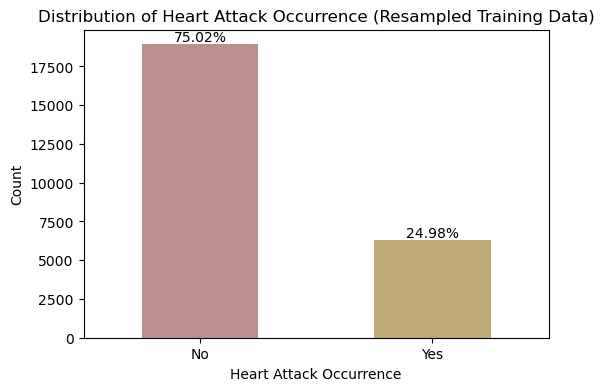

In [41]:
import matplotlib.pyplot as plt

# Plotting the bar chart for the resampled training data
plt.figure(figsize=(6,4))
ax = y_train_resampled.value_counts().plot(kind='bar', color=[custom_palette[0], custom_palette[2]])  # Replace with custom_palette if needed
plt.title('Distribution of Heart Attack Occurrence (Resampled Training Data)')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Count')
ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(y_train_resampled)*100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [42]:
X_train.describe()

,Age,Cholesterol_Level,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Stress_Levels_scaled,Diabetes_History_No,Diabetes_History_Yes,Family_History_No,Family_History_Yes,Gender_Female,Gender_Male,Hypertension_History_No,Hypertension_History_Yes,Region_Rural,Region_Urban,Smoking_History_No,Smoking_History_Yes
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.500037,-0.002693,0.002995,0.008073,0.007989,0.002942,-0.005566,0.795762,0.204238,0.702667,0.297333,0.497048,0.502952,0.747667,0.252333,0.297476,0.702524,0.702095,0.297905
std,0.293452,1.001255,1.001786,0.997852,0.998310,1.000657,1.004900,0.403153,0.403153,0.457095,0.457095,0.500003,0.500003,0.434362,0.434362,0.457159,0.457159,0.457348,0.457348
min,0.000000,-3.999879,-3.882107,-3.931573,-4.242866,-4.011933,-2.529921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245902,-0.676351,-0.674453,-0.668042,-0.669718,-0.679442,-0.697368,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.491803,-0.003644,-0.004251,0.008604,0.009872,0.013932,-0.014188,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.754098,0.668078,0.679492,0.679041,0.683068,0.679723,0.678049,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.714858,4.218284,3.779918,3.829736,3.768973,2.528274,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_train_resampled.describe()

,Age,Cholesterol_Level,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Stress_Levels_scaled,Diabetes_History_No,Diabetes_History_Yes,Family_History_No,Family_History_Yes,Gender_Female,Gender_Male,Hypertension_History_No,Hypertension_History_Yes,Region_Rural,Region_Urban,Smoking_History_No,Smoking_History_Yes
count,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000,25225.000000
mean,0.501790,-0.002827,0.003434,0.014288,0.005052,0.012196,-0.013039,0.794093,0.205907,0.705649,0.294351,0.492210,0.507790,0.749653,0.250347,0.295342,0.704658,0.702755,0.297245
std,0.292807,1.000270,0.994387,0.997327,1.002698,1.005220,1.005739,0.404371,0.404371,0.455759,0.455759,0.499949,0.499949,0.433221,0.433221,0.456205,0.456205,0.457054,0.457054
min,0.000000,-3.999879,-3.882107,-3.931573,-4.242866,-4.011933,-2.529921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245902,-0.671188,-0.662181,-0.666795,-0.675369,-0.673658,-0.697738,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508197,-0.000926,-0.006313,0.019127,0.002439,0.015829,-0.021280,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.754098,0.670884,0.670126,0.683178,0.684034,0.698780,0.663720,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.714858,4.218284,3.779918,3.829736,3.768973,2.528274,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### SMOTE Resampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

**SMOTE (Synthetic Minority Over-sampling Technique)** is an oversampling technique that generates synthetic examples for the minority class instead of simply duplicating existing ones. It works by selecting a random minority class instance, identifying its nearest neighbors, and creating new samples by interpolating between them. This helps balance the dataset and improves model performance while reducing the risk of overfitting due to copying existing observations.

###### SMOTE with no specific parameter

In [44]:
X_train.dtypes

Age                         float64
Cholesterol_Level           float64
Physical_Activity            object
Diet_Quality                 object
Alcohol_Consumption          object
BMI                         float64
Heart_Rate                  float64
Systolic_BP                 float64
Diastolic_BP                float64
Stress_Levels_scaled        float64
Diabetes_History_No         float64
Diabetes_History_Yes        float64
Family_History_No           float64
Family_History_Yes          float64
Gender_Female               float64
Gender_Male                 float64
Hypertension_History_No     float64
Hypertension_History_Yes    float64
Region_Rural                float64
Region_Urban                float64
Smoking_History_No          float64
Smoking_History_Yes         float64
dtype: object

Heart_Attack_Occurrence
0    0.877213
1    0.122787
Name: proportion, dtype: float64


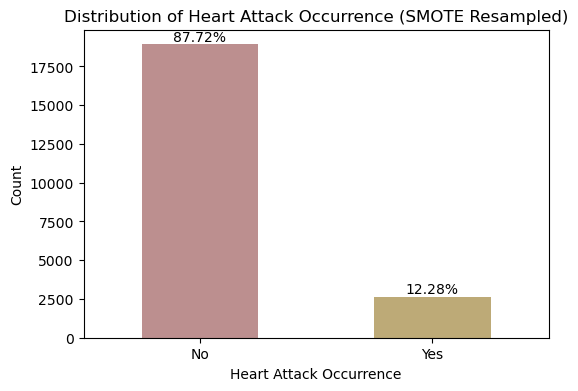

In [45]:
# We use SmoteNC because we have categorical and numerical variables to oversample
from imblearn.over_sampling import SMOTENC 

# Identify categorical feature indices
categorical_features = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object', 'category']).columns]

# Apply SMOTENC for handling both numerical and categorical variables
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.14, random_state=123)  # sampling_strategy represents the ratio between the 2 classes, can also use 'minority', 'not minority'
X_train_resampled_smote, y_train_resampled_smote = smote_nc.fit_resample(X_train, y_train)

# Verify the new class distribution
print(y_train_resampled_smote.value_counts(normalize=True))

# Plotting the bar chart for the resampled data
plt.figure(figsize=(6,4))
ax = y_train_resampled_smote.value_counts().plot(kind='bar', color=[custom_palette[0], custom_palette[2]])
plt.title('Distribution of Heart Attack Occurrence (SMOTE Resampled)')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Count')
ax.set_xticklabels({'No': 0, 'Yes': 1}, rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(y_train_resampled_smote)*100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [46]:
X_train.describe()

,Age,Cholesterol_Level,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Stress_Levels_scaled,Diabetes_History_No,Diabetes_History_Yes,Family_History_No,Family_History_Yes,Gender_Female,Gender_Male,Hypertension_History_No,Hypertension_History_Yes,Region_Rural,Region_Urban,Smoking_History_No,Smoking_History_Yes
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.500037,-0.002693,0.002995,0.008073,0.007989,0.002942,-0.005566,0.795762,0.204238,0.702667,0.297333,0.497048,0.502952,0.747667,0.252333,0.297476,0.702524,0.702095,0.297905
std,0.293452,1.001255,1.001786,0.997852,0.998310,1.000657,1.004900,0.403153,0.403153,0.457095,0.457095,0.500003,0.500003,0.434362,0.434362,0.457159,0.457159,0.457348,0.457348
min,0.000000,-3.999879,-3.882107,-3.931573,-4.242866,-4.011933,-2.529921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245902,-0.676351,-0.674453,-0.668042,-0.669718,-0.679442,-0.697368,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.491803,-0.003644,-0.004251,0.008604,0.009872,0.013932,-0.014188,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.754098,0.668078,0.679492,0.679041,0.683068,0.679723,0.678049,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.714858,4.218284,3.779918,3.829736,3.768973,2.528274,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_train_resampled_smote.describe()

,Age,Cholesterol_Level,BMI,Heart_Rate,Systolic_BP,Diastolic_BP,Stress_Levels_scaled,Diabetes_History_No,Diabetes_History_Yes,Family_History_No,Family_History_Yes,Gender_Female,Gender_Male,Hypertension_History_No,Hypertension_History_Yes,Region_Rural,Region_Urban,Smoking_History_No,Smoking_History_Yes
count,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000,21574.000000
mean,0.500219,-0.003864,0.003617,0.009068,0.005598,0.004824,-0.005083,0.797164,0.202836,0.702876,0.297124,0.496635,0.503365,0.747737,0.252263,0.296100,0.703900,0.702171,0.297829
std,0.292096,1.000226,0.997079,0.995061,0.995789,0.998678,1.002529,0.401802,0.401802,0.456559,0.456559,0.499688,0.499688,0.433849,0.433849,0.456235,0.456235,0.456947,0.456947
min,0.000000,-3.999879,-3.882107,-3.931573,-4.242866,-4.011933,-2.529921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245902,-0.676672,-0.669728,-0.667389,-0.670639,-0.674721,-0.693820,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.491803,-0.004802,-0.004251,0.009065,0.008344,0.014183,-0.014570,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.754098,0.665829,0.676334,0.678731,0.680567,0.681130,0.677136,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.714858,4.218284,3.779918,3.829736,3.768973,2.528274,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### SMOTE with lower KNN, and higher class balancement

Heart_Attack_Occurrence
0    0.714286
1    0.285714
Name: proportion, dtype: float64


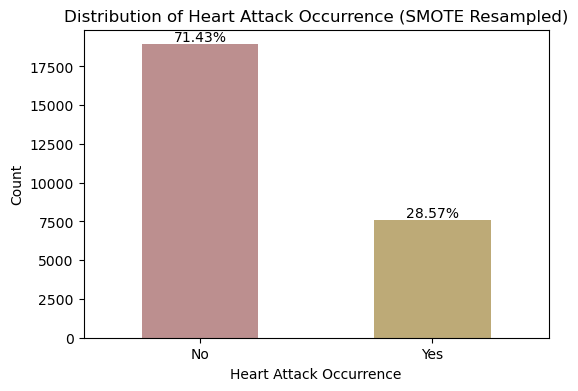

In [48]:
# We use SmoteNC because we have categorical and numerical variables to oversample
from imblearn.over_sampling import SMOTENC

# Apply SMOTENC for handling both numerical and categorical variables
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.4, k_neighbors=3, random_state=123)
X_train_resampled_smote2, y_train_resampled_smote2 = smote_nc.fit_resample(X_train, y_train)

# Verify the new class distribution
print(y_train_resampled_smote2.value_counts(normalize=True))

# Plotting the bar chart for the resampled data
plt.figure(figsize=(6,4))
ax = y_train_resampled_smote2.value_counts().plot(kind='bar', color=[custom_palette[0], custom_palette[2]])
plt.title('Distribution of Heart Attack Occurrence (SMOTE Resampled)')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Count')
ax.set_xticklabels({'No': 0, 'Yes': 1}, rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(y_train_resampled_smote2)*100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##### SMOTE + Tomek Links resampling

Tomek Links is an undersampling technique used to clean imbalanced datasets. It identifies pairs of close samples from opposite classes and removes the majority class sample to clarify the decision boundary. This helps reduce noise and improve model performance.

Heart_Attack_Occurrence
0    0.709305
1    0.290695
Name: proportion, dtype: float64


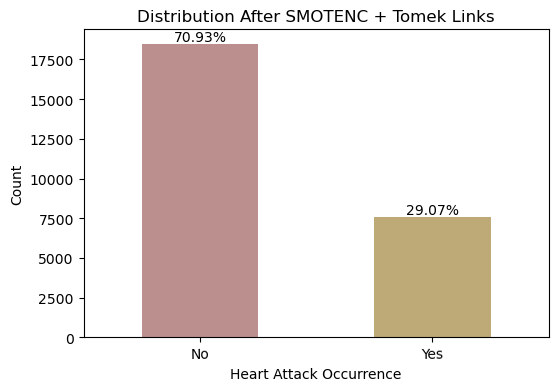

In [49]:
from imblearn.under_sampling import TomekLinks

# Apply SMOTENC for oversampling
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.4, k_neighbors=3, random_state=123)
X_train_resampled_smote_tomek, y_train_resampled_smote_tomek = smote_nc.fit_resample(X_train, y_train)

# Apply Tomek Links to remove noisy majority class samples
tomek = TomekLinks(sampling_strategy='majority')
X_train_resampled_smote_tomek, y_train_resampled_smote_tomek = tomek.fit_resample(X_train_resampled_smote_tomek, y_train_resampled_smote_tomek)

# Verify the new class distribution
print(y_train_resampled_smote_tomek.value_counts(normalize=True))

# Plot the distribution of Heart Attack Occurrence after SMOTENC + Tomek Links
plt.figure(figsize=(6,4))
ax = y_train_resampled_smote_tomek.value_counts().plot(kind='bar', color=[custom_palette[0], custom_palette[2]])
plt.title('Distribution After SMOTENC + Tomek Links')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Count')
ax.set_xticklabels({'No': 0, 'Yes': 1}, rotation=1)

# Annotate bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(y_train_resampled_smote_tomek)*100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Quick classifications

### Test on basic oversampling - X_train_resampled

In [53]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('clf', RandomForestClassifier(class_weight="balanced", random_state=123))
])

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Mean F1 Score:", cv_results['test_score'].mean())

Mean F1 Score: 0.9711517938722938


### Test on SMOTE oversampling (no k_neighbors param and sampling_strategy=0.14) - X_train_resampled_smote

In [55]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('clf', RandomForestClassifier(class_weight="balanced", random_state=123))
])

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train_resampled_smote, y_train_resampled_smote, cv=5, scoring='f1')
print("Mean F1 Score:", cv_results['test_score'].mean())

Mean F1 Score: 0.02071314981317552


### Test on SMOTE oversampling (with k_neighbors=3 and sampling_strategy=0.4) - X_train_resampled_smote2

In [56]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('clf', RandomForestClassifier(class_weight="balanced", random_state=123))
])

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train_resampled_smote2, y_train_resampled_smote2, cv=5, scoring='f1')
print("Mean F1 Score:", cv_results['test_score'].mean())

Mean F1 Score: 0.6896999056580657


### Test on SMOTE oversampling (with k_neighbors=3 and sampling_strategy=0.4) and Tomek Links - X_train_resampled_smote_tomek

In [57]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('clf', RandomForestClassifier(class_weight="balanced", random_state=123))
])

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='f1')
print("Mean F1 Score:", cv_results['test_score'].mean())

Mean F1 Score: 0.6995014060188156


The highest F1 scores were achieved with X_train_resampled, which is an oversampling by randomly duplicating some data. X_train_resampled_smote2, which applies SMOTE oversampling with k_neighbors=3 and sampling_strategy=0.4, and X_train_resampled_smote_tomek, which uses the same SMOTE parameters and a Tomek links.

Therefore, I will focus on training better models using these datasets.

## Classification

### Random Forest

#### Test on X_train_resampled with a balanced class_weight in the RandomForest

I don't train the model with a lot of hyperparameters so as not to spend 4 hours doing the calculations.

In [58]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=123)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples per leaf
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': "roc_auc"
}

# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1,  # Show progress
    scoring=scoring,  # Optimize for multiple metrics
    refit='f1'  # Select the best model based on F1-score
)

# Train the model with cross-validation
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Best model and hyperparameters
best_rf_resampled = rf_grid_search.best_estimator_
print(f"Best parameters: {rf_grid_search.best_params_}")

# Get cross-validation results for the best model
cv_results = rf_grid_search.cv_results_

# Display the mean scores across all cross-validation folds
print(f"Mean Accuracy: {cv_results['mean_test_accuracy'][rf_grid_search.best_index_]:.4f}")
print(f"Mean F1 Score: {cv_results['mean_test_f1'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Precision: {cv_results['mean_test_precision'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Recall: {cv_results['mean_test_recall'][rf_grid_search.best_index_]:.4f}")
print(f"Mean ROC AUC: {cv_results['mean_test_roc_auc'][rf_grid_search.best_index_]:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Accuracy: 0.9866
Mean F1 Score: 0.9712
Mean Precision: 1.0000
Mean Recall: 0.9462
Mean ROC AUC: 0.9746
CPU times: total: 17.2 s
Wall time: 4min 12s


In [59]:
import pickle 

# Save the model to a file
filename = 'best_rf_resampled.sav'
pickle.dump(best_rf_resampled, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [60]:
# Extract and round metrics
metrics = {
        "Model": 'RFC_data_resampled',
        "Best Parameters": str(rf_grid_search.best_params_),  # Convert dictionary to string
        "Mean Accuracy": round(rf_grid_search.cv_results_['mean_test_accuracy'][rf_grid_search.best_index_], 5),
        "Mean F1 Score": round(rf_grid_search.cv_results_['mean_test_f1'][rf_grid_search.best_index_], 5),
        "Mean Precision": round(rf_grid_search.cv_results_['mean_test_precision'][rf_grid_search.best_index_], 5),
        "Mean Recall": round(rf_grid_search.cv_results_['mean_test_recall'][rf_grid_search.best_index_], 5),
        "Mean ROC AUC": round(rf_grid_search.cv_results_['mean_test_roc_auc'][rf_grid_search.best_index_], 5)
}

# Convert to DataFrame
model_results_df = pd.DataFrame([metrics])

In [61]:
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.0,0.94619,0.97458


#### Test on X_train_resampled without balanced class_weight in the RandomForest

In [62]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=123)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples per leaf
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': "roc_auc"
}

# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1,  # Show progress
    scoring=scoring,  # Optimize for multiple metrics
    refit='f1'  # Select the best model based on F1-score
)

# Train the model with cross-validation
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Best model and hyperparameters
best_rf_resampled_nobalance = rf_grid_search.best_estimator_
print(f"Best parameters: {rf_grid_search.best_params_}")

# Get cross-validation results for the best model
cv_results = rf_grid_search.cv_results_

# Display the mean scores across all cross-validation folds
print(f"Mean Accuracy: {cv_results['mean_test_accuracy'][rf_grid_search.best_index_]:.4f}")
print(f"Mean F1 Score: {cv_results['mean_test_f1'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Precision: {cv_results['mean_test_precision'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Recall: {cv_results['mean_test_recall'][rf_grid_search.best_index_]:.4f}")
print(f"Mean ROC AUC: {cv_results['mean_test_roc_auc'][rf_grid_search.best_index_]:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Accuracy: 0.9865
Mean F1 Score: 0.9711
Mean Precision: 0.9998
Mean Recall: 0.9462
Mean ROC AUC: 0.9745
CPU times: total: 18.3 s
Wall time: 4min 18s


In [63]:
import pickle 

# Save the model to a file
filename = 'best_rf_resampled_nobalance.sav'
pickle.dump(best_rf_resampled_nobalance, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [66]:
# Extract and round metrics
metrics = {
        "Model": 'RFC_data_resampled_nobalance',
        "Best Parameters": str(rf_grid_search.best_params_),  # Convert dictionary to string
        "Mean Accuracy": round(rf_grid_search.cv_results_['mean_test_accuracy'][rf_grid_search.best_index_], 5),
        "Mean F1 Score": round(rf_grid_search.cv_results_['mean_test_f1'][rf_grid_search.best_index_], 5),
        "Mean Precision": round(rf_grid_search.cv_results_['mean_test_precision'][rf_grid_search.best_index_], 5),
        "Mean Recall": round(rf_grid_search.cv_results_['mean_test_recall'][rf_grid_search.best_index_], 5),
        "Mean ROC AUC": round(rf_grid_search.cv_results_['mean_test_roc_auc'][rf_grid_search.best_index_], 5)
}

# Convert to DataFrame
model_results_resampled_nobalance = pd.DataFrame([metrics])

In [68]:
model_results_df = pd.concat([model_results_df, model_results_resampled_nobalance], ignore_index=True)
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449


#### Test on data_resampled_smote2

In [69]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=123)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples per leaf
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': "roc_auc"
}

# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1,  # Show progress
    scoring=scoring,  # Optimize for multiple metrics
    refit='f1'  # Select the best model based on F1-score
)

# Train the model with cross-validation
rf_grid_search.fit(X_train_resampled_smote2, y_train_resampled_smote2)

# Best model and hyperparameters
best_rf_resampled_smote2 = rf_grid_search.best_estimator_
print(f"Best parameters: {rf_grid_search.best_params_}")

# Get cross-validation results for the best model
cv_results = rf_grid_search.cv_results_

# Display the mean scores across all cross-validation folds
print(f"Mean Accuracy: {cv_results['mean_test_accuracy'][rf_grid_search.best_index_]:.4f}")
print(f"Mean F1 Score: {cv_results['mean_test_f1'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Precision: {cv_results['mean_test_precision'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Recall: {cv_results['mean_test_recall'][rf_grid_search.best_index_]:.4f}")
print(f"Mean ROC AUC: {cv_results['mean_test_roc_auc'][rf_grid_search.best_index_]:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Mean Accuracy: 0.8809
Mean F1 Score: 0.7230
Mean Precision: 0.9610
Mean Recall: 0.6034
Mean ROC AUC: 0.9334
CPU times: total: 41.7 s
Wall time: 4min 45s


In [70]:
import pickle 

# Save the model to a file
filename = 'best_rf_resampled_smote2.sav'
pickle.dump(best_rf_resampled_smote2, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [71]:
# Extract and round metrics
metrics = {
        "Model": 'RFC_data_resampled_smote2',
        "Best Parameters": str(rf_grid_search.best_params_),  # Convert dictionary to string
        "Mean Accuracy": round(rf_grid_search.cv_results_['mean_test_accuracy'][rf_grid_search.best_index_], 5),
        "Mean F1 Score": round(rf_grid_search.cv_results_['mean_test_f1'][rf_grid_search.best_index_], 5),
        "Mean Precision": round(rf_grid_search.cv_results_['mean_test_precision'][rf_grid_search.best_index_], 5),
        "Mean Recall": round(rf_grid_search.cv_results_['mean_test_recall'][rf_grid_search.best_index_], 5),
        "Mean ROC AUC": round(rf_grid_search.cv_results_['mean_test_roc_auc'][rf_grid_search.best_index_], 5)
}

# Convert to DataFrame
best_result_smote2_df = pd.DataFrame([metrics])

In [73]:
model_results_df = pd.concat([model_results_df, best_result_smote2_df], ignore_index=True)
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449
2,RFC_data_resampled_smote2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88092,0.72300,0.96103,0.60343,0.93338


#### Test on data_resampled_smote_tomek

In [74]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=123)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples per leaf
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': "roc_auc"
}

# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1,  # Show progress
    scoring=scoring,  # Optimize for multiple metrics
    refit='f1'  # Select the best model based on F1-score
)

# Train the model with cross-validation
rf_grid_search.fit(X_train_resampled_smote_tomek, y_train_resampled_smote_tomek)

# Best model and hyperparameters
best_rf_resampled_smote_tomek = rf_grid_search.best_estimator_
print(f"Best parameters: {rf_grid_search.best_params_}")

# Get cross-validation results for the best model
cv_results = rf_grid_search.cv_results_

# Display the mean scores across all cross-validation folds
print(f"Mean Accuracy: {cv_results['mean_test_accuracy'][rf_grid_search.best_index_]:.4f}")
print(f"Mean F1 Score: {cv_results['mean_test_f1'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Precision: {cv_results['mean_test_precision'][rf_grid_search.best_index_]:.4f}")
print(f"Mean Recall: {cv_results['mean_test_recall'][rf_grid_search.best_index_]:.4f}")
print(f"Mean ROC AUC: {cv_results['mean_test_roc_auc'][rf_grid_search.best_index_]:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Mean Accuracy: 0.8823
Mean F1 Score: 0.7316
Mean Precision: 0.9635
Mean Recall: 0.6145
Mean ROC AUC: 0.9357
CPU times: total: 41.8 s
Wall time: 4min 42s


In [75]:
import pickle 

# Save the model to a file
filename = 'best_rf_resampled_smote_tomek.sav'
pickle.dump(best_rf_resampled_smote_tomek, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [76]:
# Extract and round metrics
metrics = {
        "Model": 'RFC_data_resampled_smote_tomek',
        "Best Parameters": str(rf_grid_search.best_params_),  # Convert dictionary to string
        "Mean Accuracy": round(rf_grid_search.cv_results_['mean_test_accuracy'][rf_grid_search.best_index_], 5),
        "Mean F1 Score": round(rf_grid_search.cv_results_['mean_test_f1'][rf_grid_search.best_index_], 5),
        "Mean Precision": round(rf_grid_search.cv_results_['mean_test_precision'][rf_grid_search.best_index_], 5),
        "Mean Recall": round(rf_grid_search.cv_results_['mean_test_recall'][rf_grid_search.best_index_], 5),
        "Mean ROC AUC": round(rf_grid_search.cv_results_['mean_test_roc_auc'][rf_grid_search.best_index_], 5)
}

# Convert to DataFrame
best_result_smote_tomek_df = pd.DataFrame([metrics])

In [78]:
model_results_df = pd.concat([model_results_df, best_result_smote_tomek_df], ignore_index=True)
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449
2,RFC_data_resampled_smote2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88092,0.72300,0.96103,0.60343,0.93338
3,RFC_data_resampled_smote_tomek,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88234,0.73162,0.96347,0.61453,0.93571


### XGBoost

#### XGBoost on X_train_resampled

In [71]:
#pip install optuna

In [30]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
X_train_resampled.dtypes

Age                          float64
Cholesterol_Level            float64
Physical_Activity           category
Diet_Quality                category
Alcohol_Consumption         category
BMI                          float64
Heart_Rate                   float64
Systolic_BP                  float64
Diastolic_BP                 float64
Stress_Levels_scaled         float64
Diabetes_History_No          float64
Diabetes_History_Yes         float64
Family_History_No            float64
Family_History_Yes           float64
Gender_Female                float64
Gender_Male                  float64
Hypertension_History_No      float64
Hypertension_History_Yes     float64
Region_Rural                 float64
Region_Urban                 float64
Smoking_History_No           float64
Smoking_History_Yes          float64
dtype: object

In [104]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier

# XGBoost cannot process object type
for feature in ['Physical_Activity', 'Diet_Quality', 'Alcohol_Consumption']:
    X_train_resampled[feature] = X_train_resampled[feature].astype('category')

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 200, 300)
    max_depth = trial.suggest_int('max_depth', 7, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Create the XGBoost classifier
    xgb_classifier = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=123,
        enable_categorical=True
    )

    # Perform 5-fold cross-validation using F1 score as the optimization metric
    cv_results = cross_validate(
        xgb_classifier, X_train_resampled, y_train_resampled, 
        cv=5, 
        scoring='f1', 
        n_jobs=-1
    )

    # Return the mean F1 score
    return np.mean(cv_results['test_score'])

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the hyperparameters
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best parameters found by Optuna: {best_params}")

# Train the model using the best parameters and cross-validation
best_xgb_data_resampled = XGBClassifier(**best_params, random_state=123, enable_categorical=True)

# Define multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform cross-validation to get train set performance
cv_results = cross_validate(
    best_xgb_data_resampled, X_train_resampled, y_train_resampled, 
    cv=5, 
    scoring=scoring, 
    n_jobs=-1
)

# Store mean scores
xgb_results = {
    "Model": "XGBoost_data_resampled",
    "Best Parameters": str(best_params),
    "Mean Accuracy": round(np.mean(cv_results['test_accuracy']), 5),
    "Mean F1 Score": round(np.mean(cv_results['test_f1']), 5),
    "Mean Precision": round(np.mean(cv_results['test_precision']), 5),
    "Mean Recall": round(np.mean(cv_results['test_recall']), 5),
    "Mean ROC AUC": round(np.mean(cv_results['test_roc_auc']), 5)
}

# Convert to DataFrame
xgb_results_resampled_df = pd.DataFrame([xgb_results])

# Display results
print("\nXGBoost Cross-Validation Results on Train Set:")
print(xgb_results_resampled_df)

[I 2025-02-13 16:08:38,257] A new study created in memory with name: no-name-c33ba3be-3a41-45a5-9a30-1be67cf48f09
[I 2025-02-13 16:08:51,162] Trial 0 finished with value: 0.7770833395693606 and parameters: {'n_estimators': 270, 'max_depth': 13, 'learning_rate': 0.013929139342380954, 'subsample': 0.6736806916612611, 'colsample_bytree': 0.8070193645278567}. Best is trial 0 with value: 0.7770833395693606.
[I 2025-02-13 16:08:57,364] Trial 1 finished with value: 0.9213547721224471 and parameters: {'n_estimators': 202, 'max_depth': 9, 'learning_rate': 0.10851050539113417, 'subsample': 0.5363190524643967, 'colsample_bytree': 0.7998895909603798}. Best is trial 1 with value: 0.9213547721224471.
[I 2025-02-13 16:09:10,152] Trial 2 finished with value: 0.8079115587007335 and parameters: {'n_estimators': 253, 'max_depth': 14, 'learning_rate': 0.01456791070894366, 'subsample': 0.5979775171384021, 'colsample_bytree': 0.956453110322804}. Best is trial 1 with value: 0.9213547721224471.
[I 2025-02-13 

Best parameters found by Optuna: {'n_estimators': 275, 'max_depth': 15, 'learning_rate': 0.051356315656115994, 'subsample': 0.8948941755524625, 'colsample_bytree': 0.64617356138332}

XGBoost Cross-Validation Results on Train Set:
                    Model                                    Best Parameters  \
0  XGBoost_data_resampled  {'n_estimators': 275, 'max_depth': 15, 'learni...   

   Mean Accuracy  Mean F1 Score  Mean Precision  Mean Recall  Mean ROC AUC  
0        0.98636        0.97076         0.99916      0.94619       0.97296  


In [105]:
# Save the model to a file
filename = 'best_xgb_data_resampled.sav'
pickle.dump(best_xgb_data_resampled, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [106]:
model_results_df = pd.concat([model_results_df, xgb_results_resampled_df], ignore_index=True)
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449
2,RFC_data_resampled_smote2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88092,0.72300,0.96103,0.60343,0.93338
3,RFC_data_resampled_smote_tomek,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88234,0.73162,0.96347,0.61453,0.93571
4,XGBoost_data_resampled2,"{'n_estimators': 258, 'max_depth': 15, 'learni...",0.98628,0.97060,0.99895,0.94603,0.97286
5,XGBoost_data_resampled_smote_tomek,"{'n_estimators': 284, 'max_depth': 15, 'learni...",0.89690,0.77653,0.92957,0.69485,0.83727
6,XGBoost_data_resampled,"{'n_estimators': 275, 'max_depth': 15, 'learni...",0.98636,0.97076,0.99916,0.94619,0.97296


The model clearly shows signs of overfitting when using the oversampled duplicated data.

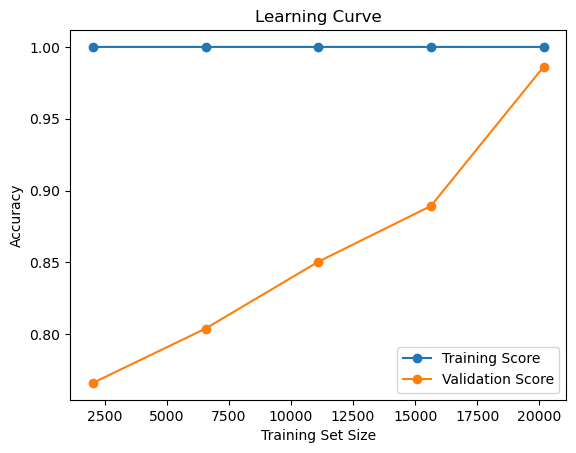

In [98]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy'
)

# Compute means and std deviations
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

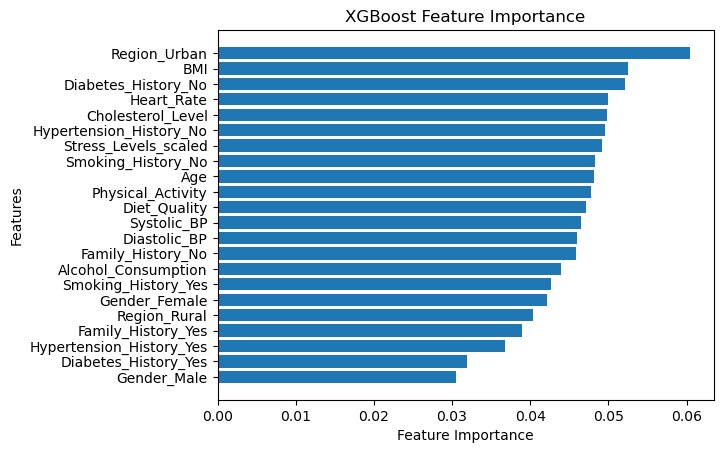

In [100]:
best_xgb_data_resampled.fit(X_train_resampled, y_train_resampled)

importances = best_xgb_data_resampled.feature_importances_
features = X_train_resampled.columns

# Sort features by importance
sorted_idx = importances.argsort()
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

The model is certainly overfitted to the training dataset. Note that the data has been oversampled using a row duplication technique, unlike the SMOTE method, which generates new data based on the original dataset. Additionally, to test both oversampling techniques, we significantly increased the minority class using this duplication method. This means that we more than doubled the size of the minority class by duplicating existing data.

#### XGBoost on data_resampled_smote_tomek

In [94]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier

# XGBoost cannot process object type
for feature in ['Physical_Activity', 'Diet_Quality', 'Alcohol_Consumption']:
    X_train_resampled_smote_tomek[feature] = X_train_resampled_smote_tomek[feature].astype('category')

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 200, 300)
    max_depth = trial.suggest_int('max_depth', 7, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Create the XGBoost classifier
    xgb_classifier = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=123,
        enable_categorical=True
    )

    # Perform 5-fold cross-validation using F1 score as the optimization metric
    cv_results = cross_validate(
        xgb_classifier, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, 
        cv=5, 
        scoring='f1', 
        n_jobs=-1
    )

    # Return the mean F1 score
    return np.mean(cv_results['test_score'])

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the hyperparameters
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best parameters found by Optuna: {best_params}")

# Train the model using the best parameters and cross-validation
best_xgb_data_resampled_smote_tomek = XGBClassifier(**best_params, random_state=123, enable_categorical=True)

# Define multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform cross-validation to get train set performance
cv_results = cross_validate(
    best_xgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, 
    cv=5, 
    scoring=scoring, 
    n_jobs=-1
)

# Store mean scores
xgb_results = {
    "Model": "XGBoost_data_resampled_smote_tomek",
    "Best Parameters": str(best_params),
    "Mean Accuracy": round(np.mean(cv_results['test_accuracy']), 5),
    "Mean F1 Score": round(np.mean(cv_results['test_f1']), 5),
    "Mean Precision": round(np.mean(cv_results['test_precision']), 5),
    "Mean Recall": round(np.mean(cv_results['test_recall']), 5),
    "Mean ROC AUC": round(np.mean(cv_results['test_roc_auc']), 5)
}

# Convert to DataFrame
xgb_results_resampled_smote_tomek_df = pd.DataFrame([xgb_results])

# Display results
print("\nXGBoost Cross-Validation Results on Train Set:")
print(xgb_results_resampled_smote_tomek_df)

[I 2025-02-13 14:41:31,772] A new study created in memory with name: no-name-94305644-46ab-43d8-aa8d-6f2742b47cee
[I 2025-02-13 14:41:37,885] Trial 0 finished with value: 0.34829721440765005 and parameters: {'n_estimators': 209, 'max_depth': 7, 'learning_rate': 0.016699166688687428, 'subsample': 0.8346861601175668, 'colsample_bytree': 0.6625849807553534}. Best is trial 0 with value: 0.34829721440765005.
[I 2025-02-13 14:41:52,586] Trial 1 finished with value: 0.03379926612798448 and parameters: {'n_estimators': 253, 'max_depth': 11, 'learning_rate': 0.0019437812572507356, 'subsample': 0.9519276138592054, 'colsample_bytree': 0.8140984390563897}. Best is trial 0 with value: 0.34829721440765005.
[I 2025-02-13 14:41:58,367] Trial 2 finished with value: 0.08911282793156894 and parameters: {'n_estimators': 255, 'max_depth': 7, 'learning_rate': 0.005439823412671997, 'subsample': 0.6659516766794074, 'colsample_bytree': 0.7000909222976774}. Best is trial 0 with value: 0.34829721440765005.
[I 20

Best parameters found by Optuna: {'n_estimators': 284, 'max_depth': 15, 'learning_rate': 0.23633169495292602, 'subsample': 0.9169320803667774, 'colsample_bytree': 0.9608684612553609}

XGBoost Cross-Validation Results on Train Set:
                                Model  \
0  XGBoost_data_resampled_smote_tomek   

                                     Best Parameters  Mean Accuracy  \
0  {'n_estimators': 284, 'max_depth': 15, 'learni...         0.8969   

   Mean F1 Score  Mean Precision  Mean Recall  Mean ROC AUC  
0        0.77653         0.92957      0.69485       0.83727  


In [95]:
# Save the model to a file
filename = 'best_xgb_data_resampled_smote_tomek.sav'
pickle.dump(best_xgb_data_resampled_smote_tomek, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [97]:
model_results_df = pd.concat([model_results_df, xgb_results_resampled_smote_tomek_df], ignore_index=True)
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449
2,RFC_data_resampled_smote2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88092,0.72300,0.96103,0.60343,0.93338
3,RFC_data_resampled_smote_tomek,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88234,0.73162,0.96347,0.61453,0.93571
4,XGBoost_data_resampled2,"{'n_estimators': 258, 'max_depth': 15, 'learni...",0.98628,0.97060,0.99895,0.94603,0.97286
5,XGBoost_data_resampled_smote_tomek,"{'n_estimators': 284, 'max_depth': 15, 'learni...",0.89690,0.77653,0.92957,0.69485,0.83727


### LightGBM (in comparison to XGBoost)

#### LightGBM on X_train_resampled

In [33]:
#pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [111]:
%%time

import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, classification_report
import numpy as np
import pandas as pd

# XGBoost cannot process object type
for feature in ['Physical_Activity', 'Diet_Quality', 'Alcohol_Consumption']:
    X_train_resampled[feature] = X_train_resampled[feature].astype('category')

# Create the LightGBM model
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=123)

# Define the hyperparameter grid for GridSearch
param_grid = {
    'num_leaves': [30, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'boosting_type': ['gbdt', 'dart'],
    'feature_fraction': [0.8, 0.9],
    'bagging_fraction': [0.7, 0.9],
    'bagging_freq': [1, 5]
}

# Initialize the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,  # Use all processors
    verbose=1,
    scoring='f1'  # Optimize for F1 score
)


# Train the model with GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_lgb_data_resampled = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters from GridSearch: {grid_search.best_params_}")

# Evaluate the model using cross-validation metrics
from sklearn.model_selection import cross_val_score
cross_val_metrics = cross_val_score(best_lgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cross_val_metrics}")
print(f"Mean cross-validation F1 score: {np.mean(cross_val_metrics):.4f}")

cross_val_f1 = cross_val_score(best_lgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
cross_val_accuracy = cross_val_score(best_lgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cross_val_precision = cross_val_score(best_lgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='precision')
cross_val_recall = cross_val_score(best_lgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
cross_val_roc_auc = cross_val_score(best_lgb_data_resampled, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

print(f"Mean cross-validation F1 Score: {np.mean(cross_val_f1):.4f}")
print(f"Mean cross-validation Accuracy: {np.mean(cross_val_accuracy):.4f}")
print(f"Mean cross-validation Precision: {np.mean(cross_val_precision):.4f}")
print(f"Mean cross-validation Recall: {np.mean(cross_val_recall):.4f}")
print(f"Mean cross-validation ROC AUC: {np.mean(cross_val_roc_auc):.4f}")


# Store mean scores
lgb_results = {
    "Model": "LightGBM_data_resampled",
    "Best Parameters": str(best_params),
    "Mean Accuracy": round(np.mean(cross_val_accuracy), 5),
    "Mean F1 Score": round(np.mean(cross_val_f1), 5),
    "Mean Precision": round(np.mean(cross_val_precision), 5),
    "Mean Recall": round(np.mean(cross_val_recall), 5),
    "Mean ROC AUC": round(np.mean(cross_val_roc_auc), 5)
}

# Convert to DataFrame
lgb_results_data_resampled = pd.DataFrame([lgb_results])

# Display results
print("\nXGBoost Cross-Validation Results on Train Set:")
print(lgb_results_data_resampled)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6300, number of negative: 18925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [112]:
# Save the model to a file
filename = 'best_lgb_data_resampled.sav'
pickle.dump(best_lgb_data_resampled, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [114]:
model_results_df = pd.concat([model_results_df, lgb_results_data_resampled], ignore_index=True)
model_results_df

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449
2,RFC_data_resampled_smote2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88092,0.72300,0.96103,0.60343,0.93338
3,RFC_data_resampled_smote_tomek,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88234,0.73162,0.96347,0.61453,0.93571
4,XGBoost_data_resampled_smote_tomek,"{'n_estimators': 284, 'max_depth': 15, 'learni...",0.89690,0.77653,0.92957,0.69485,0.83727
5,XGBoost_data_resampled,"{'n_estimators': 275, 'max_depth': 15, 'learni...",0.98636,0.97076,0.99916,0.94619,0.97296
6,LightGBM_data_resampled,"{'bagging_fraction': 0.7, 'bagging_freq': 1, '...",0.90180,0.75759,0.97664,0.62159,0.95232


#### LightGBM on X_train_resampled_smote_tomek

In [115]:
%%time

import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, classification_report
import numpy as np
import pandas as pd

# XGBoost cannot process object type
for feature in ['Physical_Activity', 'Diet_Quality', 'Alcohol_Consumption']:
    X_train_resampled_smote_tomek[feature] = X_train_resampled_smote_tomek[feature].astype('category')

# Create the LightGBM model
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=123)

# Define the hyperparameter grid for GridSearch
param_grid = {
    'num_leaves': [30, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'boosting_type': ['gbdt', 'dart'],
    'feature_fraction': [0.8, 0.9],
    'bagging_fraction': [0.7, 0.9],
    'bagging_freq': [1, 5]
}

# Initialize the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,  # Use all processors
    verbose=1,
    scoring='f1'  # Optimize for F1 score
)


# Train the model with GridSearchCV
grid_search.fit(X_train_resampled_smote_tomek, y_train_resampled_smote_tomek)

# Get the best model from GridSearchCV
best_lgb_data_resampled_smote_tomek = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters from GridSearch: {grid_search.best_params_}")

# Evaluate the model using cross-validation metrics
from sklearn.model_selection import cross_val_score
cross_val_metrics = cross_val_score(best_lgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cross_val_metrics}")
print(f"Mean cross-validation F1 score: {np.mean(cross_val_metrics):.4f}")

cross_val_f1 = cross_val_score(best_lgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='f1')
cross_val_accuracy = cross_val_score(best_lgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='accuracy')
cross_val_precision = cross_val_score(best_lgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='precision')
cross_val_recall = cross_val_score(best_lgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='recall')
cross_val_roc_auc = cross_val_score(best_lgb_data_resampled_smote_tomek, X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, cv=5, scoring='roc_auc')

print(f"Mean cross-validation F1 Score: {np.mean(cross_val_f1):.4f}")
print(f"Mean cross-validation Accuracy: {np.mean(cross_val_accuracy):.4f}")
print(f"Mean cross-validation Precision: {np.mean(cross_val_precision):.4f}")
print(f"Mean cross-validation Recall: {np.mean(cross_val_recall):.4f}")
print(f"Mean cross-validation ROC AUC: {np.mean(cross_val_roc_auc):.4f}")


# Store mean scores
lgb_results = {
    "Model": "LightGBM_data_resampled_smote_tomek",
    "Best Parameters": str(best_params),
    "Mean Accuracy": round(np.mean(cross_val_accuracy), 5),
    "Mean F1 Score": round(np.mean(cross_val_f1), 5),
    "Mean Precision": round(np.mean(cross_val_precision), 5),
    "Mean Recall": round(np.mean(cross_val_recall), 5),
    "Mean ROC AUC": round(np.mean(cross_val_roc_auc), 5)
}

# Convert to DataFrame
lgb_results_data_smote_tomek_df = pd.DataFrame([lgb_results])

# Display results
print("\nXGBoost Cross-Validation Results on Train Set:")
print(lgb_results_data_smote_tomek_df)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 7570, number of negative: 18471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [94]:
# Save the model to a file
filename = 'best_lgb_data_resampled_smote_tomek.sav'
pickle.dump(best_lgb_data_resampled_smote_tomek, open(filename, 'wb'))
# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))

In [116]:
model_results_df2 = pd.concat([model_results_df, lgb_results_data_smote_tomek_df], ignore_index=True)
model_results_df2

,Model,Best Parameters,Mean Accuracy,Mean F1 Score,Mean Precision,Mean Recall,Mean ROC AUC
0,RFC_data_resampled,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98656,0.97115,1.00000,0.94619,0.97458
1,RFC_data_resampled_nobalance,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.98652,0.97107,0.99984,0.94619,0.97449
2,RFC_data_resampled_smote2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88092,0.72300,0.96103,0.60343,0.93338
3,RFC_data_resampled_smote_tomek,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.88234,0.73162,0.96347,0.61453,0.93571
4,XGBoost_data_resampled_smote_tomek,"{'n_estimators': 284, 'max_depth': 15, 'learni...",0.89690,0.77653,0.92957,0.69485,0.83727
5,XGBoost_data_resampled,"{'n_estimators': 275, 'max_depth': 15, 'learni...",0.98636,0.97076,0.99916,0.94619,0.97296
6,LightGBM_data_resampled,"{'bagging_fraction': 0.7, 'bagging_freq': 1, '...",0.90180,0.75759,0.97664,0.62159,0.95232
7,LightGBM_data_resampled_smote_tomek,"{'bagging_fraction': 0.9, 'bagging_freq': 1, '...",0.90857,0.73364,0.99676,0.68824,0.90096


## Conclusion

Analyzing this dataset is somewhat premature, as the data has been removed from Kaggle. As a result, I am unable to evaluate my best model on the test set or reduce the number of features used. I also could have implemented a voting classifier among the top 2-3 models that do not solely rely on artificially duplicated data (i.e., those trained with SMOTE-Tomek or SMOTE). Additionally, I could have performed probabilistic predictions on the test set instead of making raw predictions.


That said, even though we cannot test our model on the test set, it is important to note that the metrics in our table are derived from cross-validation. This means that part of the data was set aside to evaluate the model in a way similar to a test set, but using the training data. However, these results are biased because the cross-validation was conducted on oversampled data, whereas our test set would have only been normalized to match the training data.


The best-performing model, a close competition between LightGBM and XGBoost—both trained on SMOTE + Tomek Links data—shows strong results, particularly in recall, which is our primary metric given the dataset's significant imbalance (75-25 after resampling and 90-10 without resampling).


For both models, we achieve a recall of 68-69%, meaning that 68-69% of patients with a heart condition are correctly identified. To further improve these results, several approaches could be explored:


Acquiring more data to better balance the target variable.
Optimizing feature engineering to enhance the model’s ability to detect heart conditions.
Fine-tuning hyperparameters to see if performance can be improved.
Experimenting with advanced class imbalance handling techniques, such as ADASYN, which generates synthetic examples more intelligently than SMOTE by considering the local distribution of minority class data.
Leveraging ensemble methods like stacking, combining multiple complementary models (e.g., XGBoost, LightGBM, and a neural network) for a more robust prediction.
Refining feature selection using SHAP or LASSO to retain only the most influential variables and prevent overfitting on irrelevant information.
Ultimately, since the dataset is no longer available, I won’t be able to further improve my model.


It is also important to mention that all model trainings conducted in my notebook were optimized to maximize the F1-score rather than recall. However, as stated in the conclusion, the dataset is now private on Kaggle, meaning I can no longer modify my code or adjust my models to prioritize other metrics such as recall.